In [1]:
#Load required libraries
import pandas as pd
import numpy as np

In [2]:

from sklearn import preprocessing
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 


In [3]:
#Read the data
data = pd.read_csv("train.csv")

In [4]:
#To check the shape of the data
data.shape

(10738, 12)

In [5]:
#To check column details of the data
data.columns

Index(['customer_id', 'customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment', 'X1',
       'customer_category'],
      dtype='object')

In [6]:
#To check data types of each columns
data.dtypes

customer_id                          object
customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object

In [7]:
# What is the distribution of numerical columns?
data.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


In [8]:
# What about categorical variable levels count?
data.describe(include=['object'])

,customer_id,customer_active_segment,X1
count,10738,10715,10701
unique,10738,5,5
top,csid_8277,C,BA
freq,1,4919,4511


In [9]:
data.X1.value_counts()

BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64

In [10]:
data.customer_active_segment.value_counts()

C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64

In [11]:
data.customer_category.value_counts()

0    9443
1    1295
Name: customer_category, dtype: int64

In [12]:
#Load required library
import seaborn as sns
import matplotlib.pyplot as plt

### Distribution of Target variable

Percentage of 1: 12.059973924380705 %


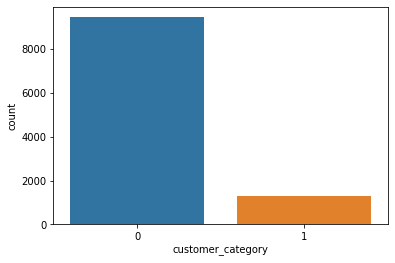

In [13]:
# Plot Distribution
sns.countplot(x='customer_category', data=data)


# What are the counts?
data.customer_category.value_counts()

# What is the percentage?
count_1 = len(data[data.customer_category == 1])
count_0 = len(data[data.customer_category != 1])

percent_1= (count_1/(count_1 + count_0))*100

print('Percentage of 1:', percent_1, "%")

### Distribution of independent categorical variable

BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64

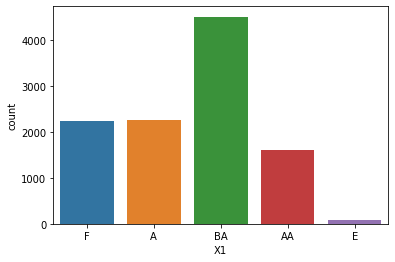

In [14]:
sns.countplot(x="X1", data=data)
data.X1.value_counts()

C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64

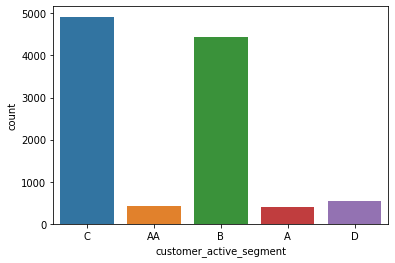

In [15]:
sns.countplot(x="customer_active_segment", data=data)
data.customer_active_segment.value_counts()

### Drawing trends toward the target variable

In [16]:
data.groupby('customer_category').mean()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
customer_category,,,,,,,,
0,20.296374,5.484775,0.066231,0.066873,1.568982,5.325258,3.297922,18.966293
1,10.052302,3.746855,0.975697,2.616505,8.268110,9.165104,2.073820,3.174739


### Distribution of independent numerical variable

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


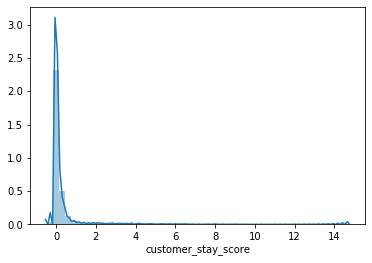

In [17]:
# Check distribution of stay_score
%matplotlib inline
sns.distplot(data["customer_stay_score"] )

In [18]:
# Who are subscribing the most across job ranks?
data[data.customer_category ==1].customer_stay_score.value_counts()

 2.492295    1
 1.382588    1
-0.108410    1
 2.195390    1
 0.353945    1
            ..
 9.012255    1
 4.859309    1
 0.181170    1
 1.848374    1
 3.556194    1
Name: customer_stay_score, Length: 1290, dtype: int64

In [19]:
# Who are subscribing the most across job ranks?
data[data.customer_category ==1].customer_active_segment.value_counts()

C     624
D     381
B     284
A       2
AA      2
Name: customer_active_segment, dtype: int64

In [20]:
# Who are subscribing the most across job ranks?
data[data.customer_category ==1].X1.value_counts()

BA    658
F     577
A      32
AA     22
E       2
Name: X1, dtype: int64

### Feature Engineering

#### Split Numeric and Categorical Columns

In [21]:
#Categorical columns
cat_col = ['customer_category', 'X1', 'customer_active_segment']

In [22]:
#Type casting 
data[cat_col] = data[cat_col].astype('category')

In [23]:
#Drop unnecessary column
data.drop("customer_id", axis =1, inplace=True)

In [24]:
num_col = list(data.columns.difference(cat_col))

In [25]:
num_col

['customer_affinity_score',
 'customer_ctr_score',
 'customer_frequency_score',
 'customer_order_score',
 'customer_product_search_score',
 'customer_product_variation_score',
 'customer_stay_score',
 'customer_visit_score']

In [26]:
cat_col

['customer_category', 'X1', 'customer_active_segment']

In [27]:
cat_col = ['X1', 'customer_active_segment']

In [28]:
cat_col

['X1', 'customer_active_segment']

#### Handle Missing Values

In [29]:
data.isnull().sum()

customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

### Train-Test Split

In [96]:
data.dtypes

customer_visit_score                 float64
customer_product_search_score        float64
customer_ctr_score                   float64
customer_stay_score                  float64
customer_frequency_score             float64
customer_product_variation_score     float64
customer_order_score                 float64
customer_affinity_score              float64
customer_active_segment             category
X1                                  category
customer_category                   category
dtype: object

In [30]:
X_train, y_train = data.loc[:,data.columns!='customer_category'], data.loc[:,'customer_category']

In [31]:
X_train.shape, y_train.shape

((10738, 10), (10738,))

In [32]:
# Numerical Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Categorical Pipeline 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col),
        ('cat', categorical_transformer, cat_col)])

### Logistic Classifier

In [33]:
#Logistic Regression

clf_logreg = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('classifier', LogisticRegression())])


In [34]:
#Fit logistic regression model
clf_logreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [35]:
#Evaluate model

train_pred = clf_logreg.predict(X_train)

print(clf_logreg.score(X_train, y_train))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))



0.9742968895511268
[[9390   53]
 [ 223 1072]]


In [36]:
# Define custom function to print accuracy, precision and recall

def convert_for_sklearn(label_list):
    return [1 if i == 'yes' else 0 for i in label_list]


def accuracy_precision_recall_metrics(y_true, y_pred):
    
    y_test_scoring = convert_for_sklearn(y_true)
    test_pred_scoring = convert_for_sklearn(y_pred)

    acc = accuracy_score(y_true= y_test_scoring, y_pred = test_pred_scoring)
    prec = precision_score(y_true= y_test_scoring, y_pred = test_pred_scoring)
    rec = recall_score(y_true= y_test_scoring, y_pred = test_pred_scoring)
    
    print("Test Precision: ",prec)
    print("Test Recall: ",rec)
    print("Test Accuracy: ",acc)

In [37]:
train_pred = clf_logreg.predict(X_train)
#test_pred = clf_logreg.predict(X_test)

print(clf_logreg.score(X_train, y_train))
#print(clf_logreg.score(X_test, y_test))
print("\n")
print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)
confusion_matrix_test

0.9742968895511268


[[9390   53]
 [ 223 1072]]


NameError: name 'y_test' is not defined

In [ ]:
Accuracy_test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

Precision_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,1]+confusion_matrix_test[0,1])
Recall_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])

print("Test Precision: ",Precision_Test)
print("Test Recall: ",Recall_Test)
print("Train Accuracy: ",Accuracy_test)

### Decision Tree Classifier

In [38]:
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

# Add to GridSearchCV

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)


In [39]:
# Build Model
%time dt_grid.fit(X_train, y_train)

CPU times: user 47.7 s, sys: 977 ms, total: 48.6 s
Wall time: 55.9 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [40]:
train_pred = dt_grid.predict(X_train)

print(dt_grid.score(X_train, y_train))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))


0.9787669957161482
[[9399   44]
 [ 184 1111]]


### Random Forest 

In [41]:
# Build Preprocessor and RF Pipeline

clf=Pipeline(steps=[('preprocessor, preprocessor'),
                   ('classifier', RandomForestClassifier())])

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'r' (type <class 'str'>) doesn't

In [42]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"classifier__n_estimators" : [150, 250, 300],
              "classifier__max_depth" : [5,8,10],
              "classifier__max_features" : [3, 5, 7],
              "classifier__min_samples_leaf" : [4, 6, 8, 10]}

rf_grid = GridSearchCV(clf, param_grid=dt_param_grid, cv=kfold)

NameError: name 'clf' is not defined

In [43]:
rf_grid.fit(X_train,y_train)

NameError: name 'rf_grid' is not defined

In [44]:
rf_grid.best_params_

NameError: name 'rf_grid' is not defined

### Gradient Boosting

In [45]:
gbm_clf = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('GBM',GradientBoostingClassifier())])

In [46]:
gbm_param_grid = {'GBM__max_depth': [8,10,12,14], 'GBM__subsample': [0.8, 0.6,], 'GBM__max_features':[0.2, 0.3], 
              'GBM__n_estimators': [10, 20, 30]}

gbm_grid = GridSearchCV(gbm_clf, param_grid=gbm_param_grid, cv=3)

%time gbm_grid.fit(X_train,y_train)

CPU times: user 1min 31s, sys: 1.24 s, total: 1min 32s
Wall time: 1min 40s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [47]:
train_pred = gbm_grid.predict(X_train)
#test_pred = gbm_grid.predict(X_test)

print(gbm_grid.score(X_train, y_train))
#print(gbm_grid.score(X_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

0.990687278822872
[[9441    2]
 [  98 1197]]


### XG Boost Classifier

In [48]:
#!pip install xgboost

In [49]:
from xgboost import XGBClassifier

In [50]:
XGB_clf = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('XGB',XGBClassifier())])

In [51]:
xgb_param_grid = {'XGB__max_depth': [8,10,12,14], 'XGB__subsample': [0.8, 0.6,], 'XGB__max_features':[0.2, 0.3], 
              'XGB__n_estimators': [10, 20, 30]}

xgb_grid = GridSearchCV(XGB_clf, param_grid=xgb_param_grid, cv=3)

%time xgb_grid.fit(X_train,y_train)

CPU times: user 1min 8s, sys: 541 ms, total: 1min 9s
Wall time: 1min 10s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [52]:
train_pred = gbm_grid.predict(X_train)
#test_pred = gbm_grid.predict(X_test)

print(gbm_grid.score(X_train, y_train))
#print(gbm_grid.score(X_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

0.990687278822872
[[9441    2]
 [  98 1197]]


### Test Data

In [53]:
test_data = pd.read_csv("test.csv")

In [54]:
td = test_data.copy()

In [55]:
test_data.drop("customer_id", axis =1, inplace=True)

In [56]:
test_data.shape

(7160, 10)

In [57]:
test_data.columns

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment', 'X1'],
      dtype='object')

In [58]:
X_test = test_data

In [59]:
X_test.shape

(7160, 10)

In [60]:
#Logistic classifier
test_pred_lr = clf_logreg.predict(X_test)

In [61]:
test_pred_lr

array([0, 0, 0, ..., 0, 0, 1])

In [65]:
final=pd.DataFrame({'customer_id':td['customer_id'],'customer_category':test_pred_lr})


In [68]:
#Decision Tree classifier
test_pred_dt = dt_grid.predict(X_test)
test_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
final=pd.DataFrame({'customer_id':td['customer_id'],'customer_category':test_pred_dt})
final = final.set_index('customer_id')
final.to_csv("dt_output_1.csv")
final

,customer_category
customer_id,
csid_10739,0
csid_10740,0
csid_10741,0
csid_10742,0
csid_10743,0
...,...
csid_17894,0
csid_17895,0
csid_17896,0


In [70]:
#Gradient boosting Classifier
test_pred_gbm = gbm_grid.predict(X_test)
test_pred_gbm

array([0, 0, 0, ..., 0, 0, 1])

In [86]:
final=pd.DataFrame({'customer_id':td['customer_id'],'customer_category':test_pred_gbm})
final = final.set_index('customer_id')
final.to_csv("gbm_output_1.csv")
final

In [98]:
#RF

In [102]:
X_train

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA
...,...,...,...,...,...,...,...,...,...,...
10733,23.672615,6.701514,0.092879,-0.017332,1.210397,7.003663,3.027084,1.952911,C,BA
10734,25.673028,6.497796,0.050216,-0.047211,0.725230,5.407507,3.104172,5.124286,C,BA
10735,31.676844,7.799880,0.062961,-0.032765,0.318118,5.598486,2.403051,21.864188,A,BA
10736,28.441780,5.588302,-0.093931,0.081586,0.132177,3.616492,4.972243,86.969977,B,AA


In [101]:
# Create Decision Tree classifer object
rf = RandomForestClassifier()

# Train Decision Tree Classifer
rf = rf.fit(X_train,y_train)

#Predict the response for test dataset
#y_pred = clf.predict(test_data)

ValueError: could not convert string to float: 'C'